<h1>Analisis exploratorio </h1>
<p>Proyecto aplicado - Rescindidos Funeraria La Aurora</´p>
<p>Carlos Felipe Cortés Cataño - Carlos Luis Mora Cañas </p>

<h3> Carga de datos más librerías </h3>

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import re
import requests
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind


In [275]:
data= pd.read_csv("../data/outputs/principal_v0.4.csv")
data.head(2)


codigoPrograma                        tomador  edad  Qinscritos  Qmascotas  \
0              59          Luis Roberto Murillo   68.0         5.0        0.0   
1              84  Indris Isabel Morales Herrera  30.0        12.0        0.0   

   valorCuota  QrecauExitoso  QrecauFallido localidadVenta nombrePlan  ...  \
0       16100              6             31      La Dorada        NaN  ...   
1       31100             22             16      Manizales        NaN  ...   

  reintegrado duracionActivoI duracionActivoF  incrementoCuota  diaPago  \
0           0            1716             757           1000.0       10   
1           0            1649            1649           1000.0       16   

   nivelEconomico  barrio  localidad   latitud   longitud  
0             1.0       0  La Dorada  5.479989 -74.674757  
1             NaN       0  Manizales  5.475582 -74.672998  

[2 rows x 27 columns]

# Análisis bivariado

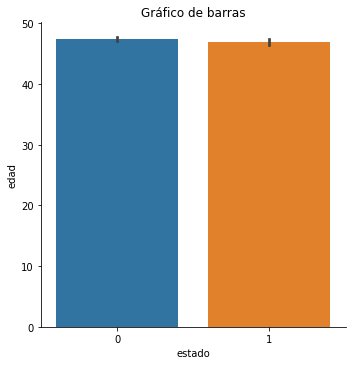

Estadístico t: -1.6555249176870321
Valor p: 0.09785654770843351


In [287]:

variable_a_evaluar = "edad"
variable_objetivo= "estado"

# Gráfico de barras
sns.catplot(x=variable_objetivo, y=variable_a_evaluar,
            data=data, kind='bar')
plt.title('Gráfico de barras')
plt.xlabel(variable_objetivo)
plt.ylabel(variable_a_evaluar)
plt.show()

# Análisis t de Student
grupo_1 = data[data[variable_objetivo] == 1][variable_a_evaluar]
grupo_2 = data[data[variable_objetivo] == 0][variable_a_evaluar]

t_statistic, p_value = ttest_ind(grupo_1, grupo_2)

# Imprimir resultados
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")


No existe evidencia suficiente para afirmar que hay asociación entre edad y el estado de un programa

Estadístico de chi-cuadrado: 85.54978641396264
Valor p: 2.610515834122316e-12
Grados de libertad: 14
Frecuencias esperadas:
estado                0           1
Qinscritos                         
0.0          972.440535  432.559465
1.0          308.689308  137.310692
2.0          214.559833   95.440167
3.0          414.584968  184.415032
4.0          703.894679  313.105321
5.0         1537.217386  683.782614
6.0          646.448014  287.551986
7.0          380.670672  169.329328
8.0          380.670672  169.329328
9.0           53.293894   23.706106
10.0          18.687469    8.312531
11.0           5.537028    2.462972
12.0           6.229156    2.770844
13.0           0.692128    0.307872
14.0           1.384257    0.615743


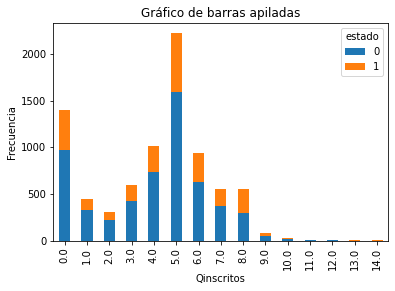

In [285]:
#Creación tabla contingencia
variable_a_evaluar = "Qinscritos"
contingency_table = pd.crosstab(
    data[variable_a_evaluar], data[variable_objetivo])

# Realizar prueba de chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Imprimir resultados
print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p_value}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(pd.DataFrame(expected, index=contingency_table.index,
      columns=contingency_table.columns))
# Gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True)
plt.title('Gráfico de barras apiladas')
plt.xlabel(variable_a_evaluar)
plt.ylabel('Frecuencia')
plt.legend(title=variable_objetivo)
plt.show()


La cantidad de inscritos indican una asociación altamente significativa entre las variables categóricas o un ajuste inadecuado en la prueba realizada. Esto implica que las variables están relacionadas entre sí o que los datos difieren significativamente de la distribución esperada.

Estadístico de chi-cuadrado: 9.79503360600165
Valor p: 0.1335532215176566
Grados de libertad: 6
Frecuencias esperadas:
estado               0            1
Qmascotas                          
0.0        4631.031756  2059.968244
1.0         805.637567   358.362433
2.0         152.960397    68.039603
3.0          37.374939    16.625061
4.0          10.381927     4.618073
5.0           6.229156     2.770844
6.0           1.384257     0.615743


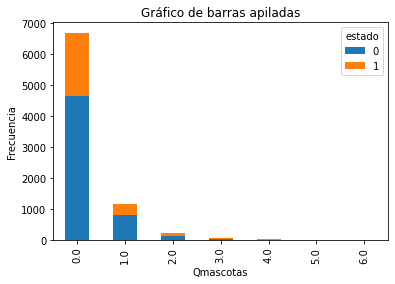

In [291]:
#Creación tabla contingencia
variable_a_evaluar = "Qmascotas"
contingency_table = pd.crosstab(
    data[variable_a_evaluar], data[variable_objetivo])

# Realizar prueba de chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Imprimir resultados
print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p_value}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(pd.DataFrame(expected, index=contingency_table.index,
      columns=contingency_table.columns))
# Gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True)
plt.title('Gráfico de barras apiladas')
plt.xlabel(variable_a_evaluar)
plt.ylabel('Frecuencia')
plt.legend(title=variable_objetivo)
plt.show()


No existe evidencia suficiente para afirmar que hay asociación entre cantidad de mascotas y el estado de un programa

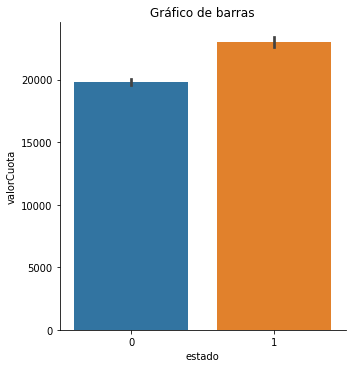

Estadístico t: 13.896208335292213
Valor p: 2.0824779854415643e-43


In [293]:

variable_a_evaluar = "valorCuota"

# Gráfico de barras
sns.catplot(x=variable_objetivo, y=variable_a_evaluar,
            data=data, kind='bar')
plt.title('Gráfico de barras')
plt.xlabel(variable_objetivo)
plt.ylabel(variable_a_evaluar)
plt.show()

# Análisis t de Student
grupo_1 = data[data[variable_objetivo] == 1][variable_a_evaluar]
grupo_2 = data[data[variable_objetivo] == 0][variable_a_evaluar]

t_statistic, p_value = ttest_ind(grupo_1, grupo_2)

# Imprimir resultados
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")


La cuota indica una diferencia entre las medias. Esta diferencia no se puede atribuir al azar o al muestreo aleatorio.

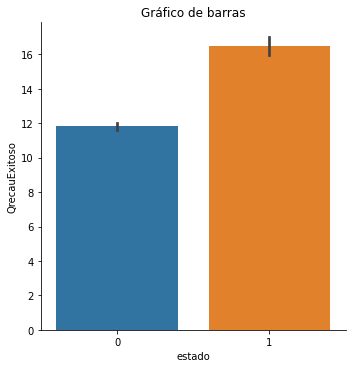

Estadístico t: 18.313673493023572
Valor p: 1.8855074266984598e-73


In [296]:
#Creación tabla contingencia
variable_a_evaluar = "QrecauExitoso"

# Gráfico de barras
sns.catplot(x=variable_objetivo, y=variable_a_evaluar,
            data=data, kind='bar')
plt.title('Gráfico de barras')
plt.xlabel(variable_objetivo)
plt.ylabel(variable_a_evaluar)
plt.show()

# Análisis t de Student
grupo_1 = data[data[variable_objetivo] == 1][variable_a_evaluar]
grupo_2 = data[data[variable_objetivo] == 0][variable_a_evaluar]

t_statistic, p_value = ttest_ind(grupo_1, grupo_2)

# Imprimir resultados
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")


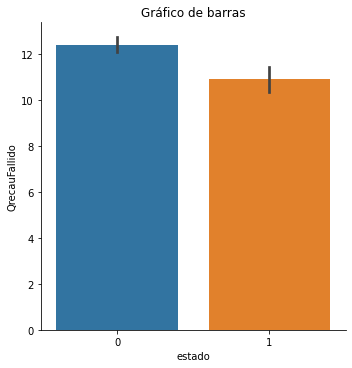

Estadístico t: -4.87996762807902
Valor p: 1.0811567706787131e-06


In [297]:
#Creación tabla contingencia
variable_a_evaluar = "QrecauFallido"

# Gráfico de barras
sns.catplot(x=variable_objetivo, y=variable_a_evaluar,
            data=data, kind='bar')
plt.title('Gráfico de barras')
plt.xlabel(variable_objetivo)
plt.ylabel(variable_a_evaluar)
plt.show()

# Análisis t de Student
grupo_1 = data[data[variable_objetivo] == 1][variable_a_evaluar]
grupo_2 = data[data[variable_objetivo] == 0][variable_a_evaluar]

t_statistic, p_value = ttest_ind(grupo_1, grupo_2)

# Imprimir resultados
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")


Estadístico de chi-cuadrado: 91.17653064920565
Valor p: 8.872858234047122e-12
Grados de libertad: 18
Frecuencias esperadas:
estado                                            0            1
localidadVenta                                                  
Aranzazu                                  31.145782    13.854218
Arauca                                    31.145782    13.854218
Bogota                                   211.791319    94.208681
Call Center Manizales                     24.916626    11.083374
Chiquinquira                             212.483448    94.516552
Dosquebradas                             227.710275   101.289725
Herveo                                     8.305542     3.694458
Kennedy                                  183.414051    81.585949
La Dorada                                227.018146   100.981854
Manizales                               3751.336439  1668.663561
Marquetalia                               26.993011    12.006989
Marulanda                      

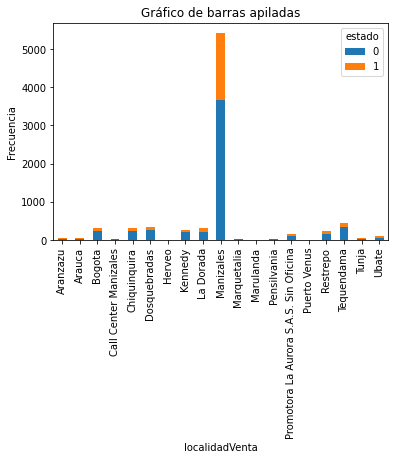

In [299]:
variable_a_evaluar = "localidadVenta"
contingency_table = pd.crosstab(
    data[variable_a_evaluar], data[variable_objetivo])

# Realizar prueba de chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Imprimir resultados
print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p_value}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(pd.DataFrame(expected, index=contingency_table.index,
      columns=contingency_table.columns))
# Gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True)
plt.title('Gráfico de barras apiladas')
plt.xlabel(variable_a_evaluar)
plt.ylabel('Frecuencia')
plt.legend(title=variable_objetivo)
plt.show()


Estadístico de chi-cuadrado: 91.17653064920565
Valor p: 8.872858234047122e-12
Grados de libertad: 18
Frecuencias esperadas:
estado                                            0            1
localidad                                                       
Aranzazu                                  31.145782    13.854218
Arauca                                    31.145782    13.854218
Bogota                                   211.791319    94.208681
Call Center Manizales                     24.916626    11.083374
Chiquinquira                             212.483448    94.516552
Dosquebradas                             227.710275   101.289725
Herveo                                     8.305542     3.694458
Kennedy                                  183.414051    81.585949
La Dorada                                227.018146   100.981854
Manizales                               3751.336439  1668.663561
Marquetalia                               26.993011    12.006989
Marulanda                      

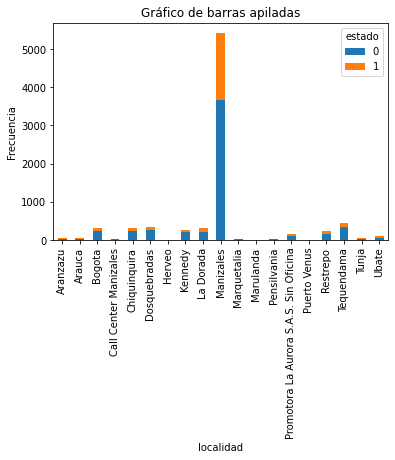

In [300]:
variable_a_evaluar = "localidad"
contingency_table = pd.crosstab(
    data[variable_a_evaluar], data[variable_objetivo])

# Realizar prueba de chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Imprimir resultados
print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p_value}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(pd.DataFrame(expected, index=contingency_table.index,
      columns=contingency_table.columns))
# Gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True)
plt.title('Gráfico de barras apiladas')
plt.xlabel(variable_a_evaluar)
plt.ylabel('Frecuencia')
plt.legend(title=variable_objetivo)
plt.show()


Si se evidencia diferencia con la localidad, se elimina localidadVenta esta teniendo los mismo resultados

In [301]:
data.drop("localidadVenta", axis=1, inplace=True)
data.columns

Index(['codigoPrograma', 'tomador', 'edad', 'Qinscritos', 'Qmascotas',
       'valorCuota', 'QrecauExitoso', 'QrecauFallido', 'nombrePlan',
       'profesionTomador', 'modaProfesionInscritos', 'modaParentesco',
       'neutralScore', 'negativeScore', 'positiveScore', 'estado',
       'reintegrado', 'duracionActivoI', 'duracionActivoF', 'incrementoCuota',
       'diaPago', 'nivelEconomico', 'barrio', 'localidad', 'latitud',
       'longitud'],
      dtype='object')

Estadístico de chi-cuadrado: 488.20719069852976
Valor p: 9.733037179661273e-71
Grados de libertad: 55
Frecuencias esperadas:
estado                                                       0           1
nombrePlan                                                                
Asistencia Exequial Mascota (Facturación Urbana...    0.277814    0.722186
Asistencia Exequial Mascota 2020                     95.012435  246.987565
Asistencia Exequial Mascotas Bogota                   5.000654   12.999346
Aurora Chec  (Facturación Urbana Chec)               17.502291   45.497709
Aurora Chec (Facturación Rural Chec)                  2.778141    7.221859
Aurora De Oro Ceder                                   0.277814    0.722186
Aurora De Oro Coopsocial                              0.277814    0.722186
Aurora De Oro Empresarial                             7.500982   19.499018
Aurora De Oro Familiar 2020                          14.724149   38.275851
Aurora Empresarial                                

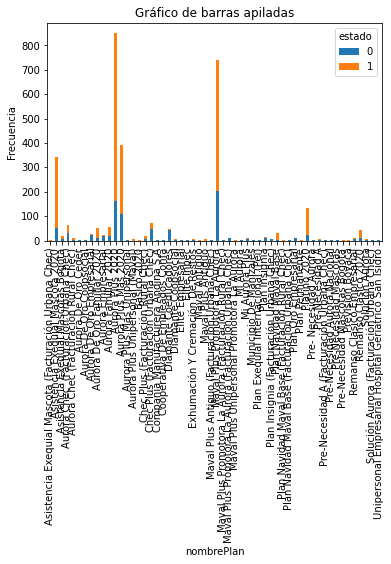

In [302]:
variable_a_evaluar = "nombrePlan"
contingency_table = pd.crosstab(
    data[variable_a_evaluar], data[variable_objetivo])

# Realizar prueba de chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Imprimir resultados
print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p_value}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(pd.DataFrame(expected, index=contingency_table.index,
      columns=contingency_table.columns))
# Gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True)
plt.title('Gráfico de barras apiladas')
plt.xlabel(variable_a_evaluar)
plt.ylabel('Frecuencia')
plt.legend(title=variable_objetivo)
plt.show()


Si existe diferencia

Estadístico de chi-cuadrado: 125.89864794225517
Valor p: 0.22942198502276057
Grados de libertad: 115
Frecuencias esperadas:
estado                     0          1
profesionTomador                       
Abogado (a)         5.556283  14.443717
Administrador (a)  10.834751  28.165249
Agente              0.555628   1.444372
Agricultor         22.502945  58.497055
Agronomo            0.277814   0.722186
...                      ...        ...
Transportador       1.389071   3.610929
Vendedor (a)        4.445026  11.554974
Veterinario (a)     1.666885   4.333115
Vigilante (a)       4.167212  10.832788
Zootecnista         0.277814   0.722186

[116 rows x 2 columns]


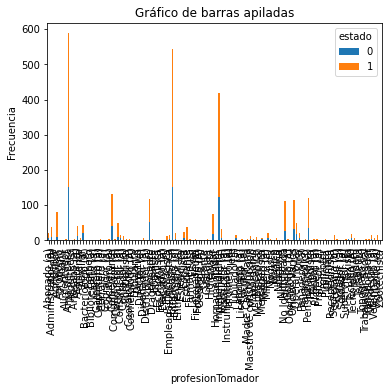

In [303]:
variable_a_evaluar = "profesionTomador"
contingency_table = pd.crosstab(
    data[variable_a_evaluar], data[variable_objetivo])

# Realizar prueba de chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Imprimir resultados
print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p_value}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(pd.DataFrame(expected, index=contingency_table.index,
      columns=contingency_table.columns))
# Gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True)
plt.title('Gráfico de barras apiladas')
plt.xlabel(variable_a_evaluar)
plt.ylabel('Frecuencia')
plt.legend(title=variable_objetivo)
plt.show()


No existe diferencia

Estadístico de chi-cuadrado: 385.4518550839
Valor p: 0.5412858395928297
Grados de libertad: 389
Frecuencias esperadas:
estado                                                     0         1
modaProfesionInscritos                                                
Abogado (a)                                         1.149179  2.850821
Abogado (a) - Agricultor - Ama de casa - Enferm...  0.287295  0.712705
Abogado (a) - Ama de casa - Camarografo (A) - I...  0.287295  0.712705
Abogado (a) - Ama de casa - Empleado (a) - Pens...  0.287295  0.712705
Abogado (a) - Ama de casa - Estudiante - Hogar ...  0.287295  0.712705
...                                                      ...       ...
Secretaria (o)                                      0.287295  0.712705
Sicologo (A)                                        0.287295  0.712705
Tecnico (A)                                         0.287295  0.712705
Vendedor (a)                                        1.149179  2.850821
Vigilante (a)                

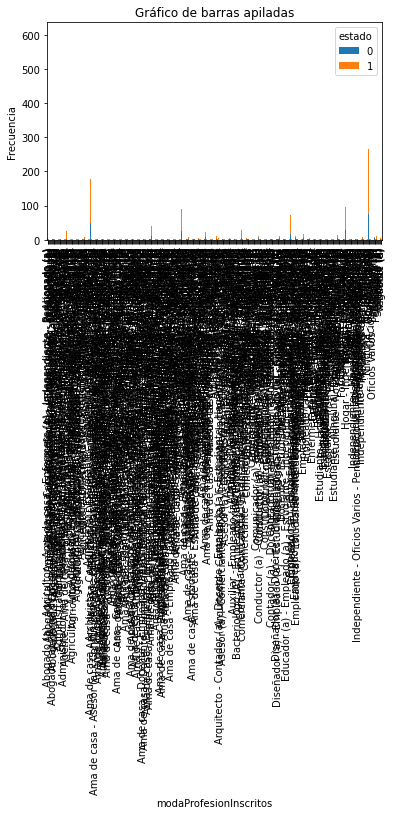

In [306]:

variable_a_evaluar = "modaProfesionInscritos"
contingency_table = pd.crosstab(
    data[variable_a_evaluar], data[variable_objetivo])

# Realizar prueba de chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Imprimir resultados
print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p_value}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(pd.DataFrame(expected, index=contingency_table.index,
      columns=contingency_table.columns))
# Gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True)
plt.title('Gráfico de barras apiladas')
plt.xlabel(variable_a_evaluar)
plt.ylabel('Frecuencia')
plt.legend(title=variable_objetivo)
plt.show()


No existe evidencia, recordemos que se componen de las modas las profesiones, intentaremos solo tener presente el primer resultado

In [318]:
alt = data["modaProfesionInscritos"].apply(lambda x: x.split("-")[0].replace(" ", "") if type(x) != float else x)


contingency_table = pd.crosstab(
    alt, data[variable_objetivo])

# Realizar prueba de chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Imprimir resultados
print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p_value}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(pd.DataFrame(expected, index=contingency_table.index,
      columns=contingency_table.columns))



Estadístico de chi-cuadrado: 50.94029194048157
Valor p: 0.5547560839708815
Grados de libertad: 53
Frecuencias esperadas:
estado                           0           1
modaProfesionInscritos                        
Abogado(a)                4.309422   10.690578
Administrador(a)          3.734832    9.265168
Agente                    0.287295    0.712705
Agricultor               23.558173   58.441827
Agronomo                  0.574590    1.425410
Albañil                   0.287295    0.712705
Amadecasa               169.503926  420.496074
Arquitecto                0.861884    2.138116
Asesor(a)                 4.022127    9.977873
Asistente                 0.287295    0.712705
Auxiliar                  3.734832    9.265168
Ayudante                  1.436474    3.563526
Bacteriologo(A)           0.287295    0.712705
Bibliotecario(a)          0.287295    0.712705
Cobrador(a)               0.574590    1.425410
Comerciante              14.652034   36.347966
Comunicador(a)            0.57459

Tampoco se encontro evidencia

Estadístico de chi-cuadrado: 610.8227782515539
Valor p: 0.6069696266737604
Grados de libertad: 621
Frecuencias esperadas:
estado                                                     0          1
modaParentesco                                                         
Abuela - Abuelo - Hermano - Madre - Padre - Pri...  0.277814   0.722186
Abuela - Compañera - Hija - Madre - Padre - TIT...  0.277814   0.722186
Abuela - Hermana - Hermano - Hijo - Madre - TIT...  0.277814   0.722186
Abuela - Hermana - Madre - Padre - TITULAR - Tio    0.277814   0.722186
Abuela - Hermano - Madre - Padre - TITULAR          0.277814   0.722186
...                                                      ...        ...
TITULAR - Tio                                       0.277814   0.722186
Tia                                                 2.222513   5.777487
Tia - Tio                                           0.277814   0.722186
Tio                                                 3.889398  10.110602
Yerno         

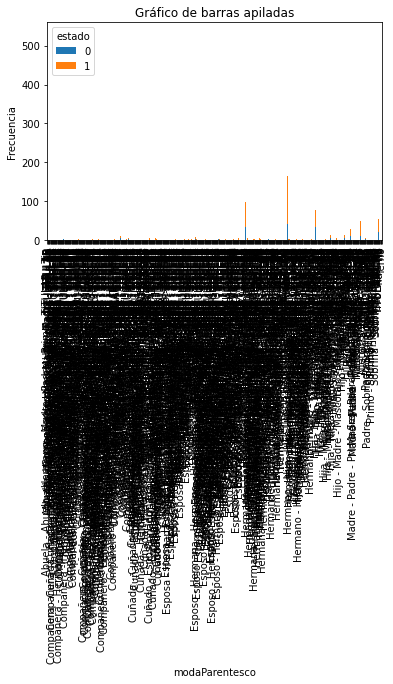

In [322]:


variable_a_evaluar = "modaParentesco"
contingency_table = pd.crosstab(
    data[variable_a_evaluar], data[variable_objetivo])

# Realizar prueba de chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Imprimir resultados
print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p_value}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(pd.DataFrame(expected, index=contingency_table.index,
      columns=contingency_table.columns))
# Gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True)
plt.title('Gráfico de barras apiladas')
plt.xlabel(variable_a_evaluar)
plt.ylabel('Frecuencia')
plt.legend(title=variable_objetivo)
plt.show()


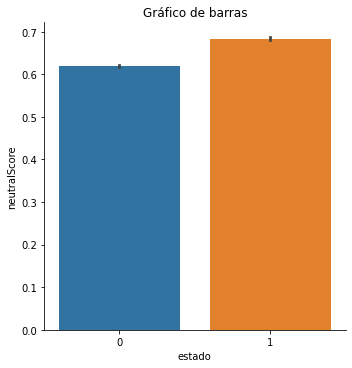

Estadístico t: 23.443117311491726
Valor p: 1.1357166447747025e-117


In [323]:
#Creación tabla contingencia
variable_a_evaluar = "neutralScore"

# Gráfico de barras
sns.catplot(x=variable_objetivo, y=variable_a_evaluar,
            data=data, kind='bar')
plt.title('Gráfico de barras')
plt.xlabel(variable_objetivo)
plt.ylabel(variable_a_evaluar)
plt.show()

# Análisis t de Student
grupo_1 = data[data[variable_objetivo] == 1][variable_a_evaluar]
grupo_2 = data[data[variable_objetivo] == 0][variable_a_evaluar]

t_statistic, p_value = ttest_ind(grupo_1, grupo_2)

# Imprimir resultados
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")


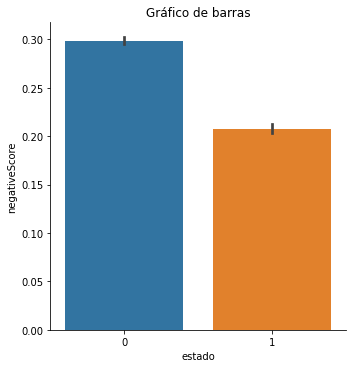

Estadístico t: -28.843843311603226
Valor p: 2.73524493114401e-174


In [324]:
#Creación tabla contingencia
variable_a_evaluar = "negativeScore"

# Gráfico de barras
sns.catplot(x=variable_objetivo, y=variable_a_evaluar,
            data=data, kind='bar')
plt.title('Gráfico de barras')
plt.xlabel(variable_objetivo)
plt.ylabel(variable_a_evaluar)
plt.show()

# Análisis t de Student
grupo_1 = data[data[variable_objetivo] == 1][variable_a_evaluar]
grupo_2 = data[data[variable_objetivo] == 0][variable_a_evaluar]

t_statistic, p_value = ttest_ind(grupo_1, grupo_2)

# Imprimir resultados
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")


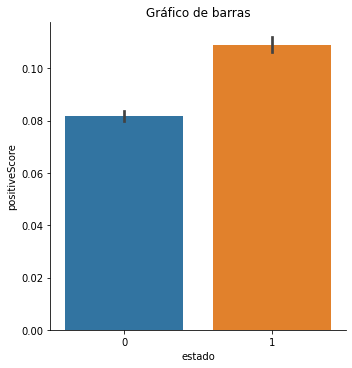

Estadístico t: 14.910231743732819
Valor p: 1.2695132560596638e-49


In [325]:
#Creación tabla contingencia
variable_a_evaluar = "positiveScore"

# Gráfico de barras
sns.catplot(x=variable_objetivo, y=variable_a_evaluar,
            data=data, kind='bar')
plt.title('Gráfico de barras')
plt.xlabel(variable_objetivo)
plt.ylabel(variable_a_evaluar)
plt.show()

# Análisis t de Student
grupo_1 = data[data[variable_objetivo] == 1][variable_a_evaluar]
grupo_2 = data[data[variable_objetivo] == 0][variable_a_evaluar]

t_statistic, p_value = ttest_ind(grupo_1, grupo_2)

# Imprimir resultados
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")


Estadístico de chi-cuadrado: 251.5095966864193
Valor p: 1.217132539024791e-56
Grados de libertad: 1
Frecuencias esperadas:
estado                 0            1
reintegrado                          
0            2911.092447  1294.907553
1            2733.907553  1216.092447


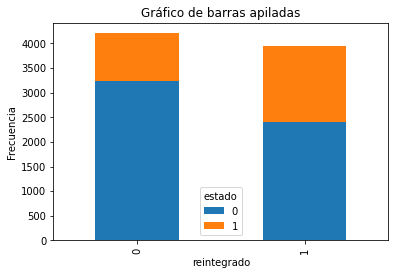

In [328]:
variable_a_evaluar = "reintegrado"
contingency_table = pd.crosstab(
    data[variable_a_evaluar], data[variable_objetivo])

# Realizar prueba de chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Imprimir resultados
print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p_value}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(pd.DataFrame(expected, index=contingency_table.index,
      columns=contingency_table.columns))
# Gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True)
plt.title('Gráfico de barras apiladas')
plt.xlabel(variable_a_evaluar)
plt.ylabel('Frecuencia')
plt.legend(title=variable_objetivo)
plt.show()


In [329]:
data.columns

Index(['codigoPrograma', 'tomador', 'edad', 'Qinscritos', 'Qmascotas',
       'valorCuota', 'QrecauExitoso', 'QrecauFallido', 'nombrePlan',
       'profesionTomador', 'modaProfesionInscritos', 'modaParentesco',
       'neutralScore', 'negativeScore', 'positiveScore', 'estado',
       'reintegrado', 'duracionActivoI', 'duracionActivoF', 'incrementoCuota',
       'diaPago', 'nivelEconomico', 'barrio', 'localidad', 'latitud',
       'longitud'],
      dtype='object')

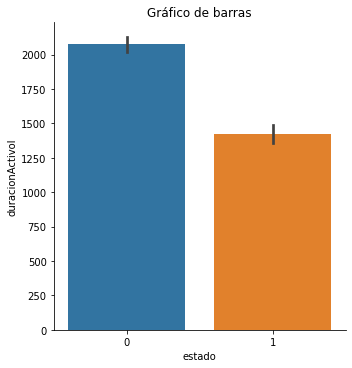

Estadístico t: -13.637593372393049
Valor p: 6.879764892174746e-42


In [331]:
variable_a_evaluar = "duracionActivoI"
# Gráfico de barras
sns.catplot(x=variable_objetivo, y=variable_a_evaluar,
            data=data, kind='bar')
plt.title('Gráfico de barras')
plt.xlabel(variable_objetivo)
plt.ylabel(variable_a_evaluar)
plt.show()

# Análisis t de Student
grupo_1 = data[data[variable_objetivo] == 1][variable_a_evaluar]
grupo_2 = data[data[variable_objetivo] == 0][variable_a_evaluar]

t_statistic, p_value = ttest_ind(grupo_1, grupo_2)

# Imprimir resultados
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")


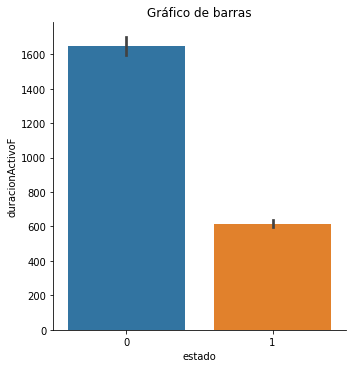

Estadístico t: -24.813327370175447
Valor p: 4.2825393453847817e-131


In [332]:
variable_a_evaluar = "duracionActivoF"
# Gráfico de barras
sns.catplot(x=variable_objetivo, y=variable_a_evaluar,
            data=data, kind='bar')
plt.title('Gráfico de barras')
plt.xlabel(variable_objetivo)
plt.ylabel(variable_a_evaluar)
plt.show()

# Análisis t de Student
grupo_1 = data[data[variable_objetivo] == 1][variable_a_evaluar]
grupo_2 = data[data[variable_objetivo] == 0][variable_a_evaluar]

t_statistic, p_value = ttest_ind(grupo_1, grupo_2)

# Imprimir resultados
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")


Se evidencia diferenciación en especial con activo final

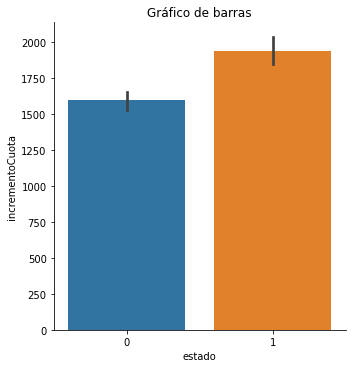

Estadístico t: 5.908522443732572
Valor p: 3.590515653401435e-09


In [334]:
variable_a_evaluar = "incrementoCuota"
# Gráfico de barras
sns.catplot(x=variable_objetivo, y=variable_a_evaluar,
            data=data, kind='bar')
plt.title('Gráfico de barras')
plt.xlabel(variable_objetivo)
plt.ylabel(variable_a_evaluar)
plt.show()

# Análisis t de Student
grupo_1 = data[data[variable_objetivo] == 1][variable_a_evaluar]
grupo_2 = data[data[variable_objetivo] == 0][variable_a_evaluar]

t_statistic, p_value = ttest_ind(grupo_1, grupo_2)

# Imprimir resultados
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")


Se evidencia diferencia

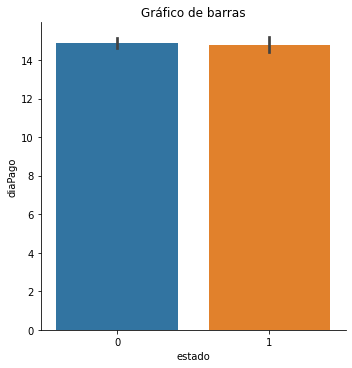

Estadístico t: -0.340958011401872
Valor p: 0.7331439763239054


In [335]:
variable_a_evaluar = "diaPago"
# Gráfico de barras
sns.catplot(x=variable_objetivo, y=variable_a_evaluar,
            data=data, kind='bar')
plt.title('Gráfico de barras')
plt.xlabel(variable_objetivo)
plt.ylabel(variable_a_evaluar)
plt.show()

# Análisis t de Student
grupo_1 = data[data[variable_objetivo] == 1][variable_a_evaluar]
grupo_2 = data[data[variable_objetivo] == 0][variable_a_evaluar]

t_statistic, p_value = ttest_ind(grupo_1, grupo_2)

# Imprimir resultados
print(f"Estadístico t: {t_statistic}")
print(f"Valor p: {p_value}")


No se evidencia diferencia

Estadístico de chi-cuadrado: 179.22161071114428
Valor p: 4.96483241122232e-36
Grados de libertad: 6
Frecuencias esperadas:
estado                    0            1
nivelEconomico                          
0.0              375.300353   308.699647
1.0              196.977817   162.022183
2.0              575.570279   473.429721
3.0             1423.288182  1170.711818
4.0              172.835689   142.164311
5.0               18.655281    15.344719
6.0               32.372399    26.627601


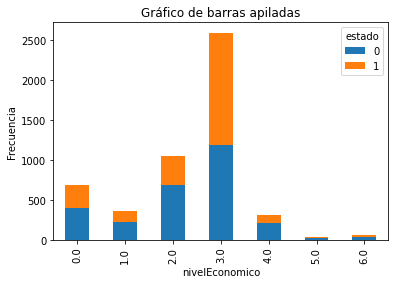

In [337]:
variable_a_evaluar = "nivelEconomico"

contingency_table = pd.crosstab(
    data[variable_a_evaluar], data[variable_objetivo])

# Realizar prueba de chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Imprimir resultados
print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p_value}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(pd.DataFrame(expected, index=contingency_table.index,
      columns=contingency_table.columns))
# Gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True)
plt.title('Gráfico de barras apiladas')
plt.xlabel(variable_a_evaluar)
plt.ylabel('Frecuencia')
plt.legend(title=variable_objetivo)
plt.show()


Estadístico de chi-cuadrado: 340.08876752361994
Valor p: 0.6659971011487199
Grados de libertad: 352
Frecuencias esperadas:
estado                             0            1
barrio                                           
0                        2906.956861  1303.043139
11 DE NOVIEMBRE             2.761954     1.238046
20 DE JULIO                17.262214     7.737786
A.S.D.                      3.452443     1.547557
AEROPUERTO EL DORADO        0.690489     0.309511
...                              ...          ...
VIVEROS                    10.357328     4.642672
VOTO NACIONAL               1.380977     0.619023
ZONA INDUSTRIAL             0.690489     0.309511
ZONA INDUSTRIAL LA ROSA     0.690489     0.309511
ZONA INDUSTRIAL N.D.        0.690489     0.309511

[353 rows x 2 columns]


/home/apoyo/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 141 (\x8d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/apoyo/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


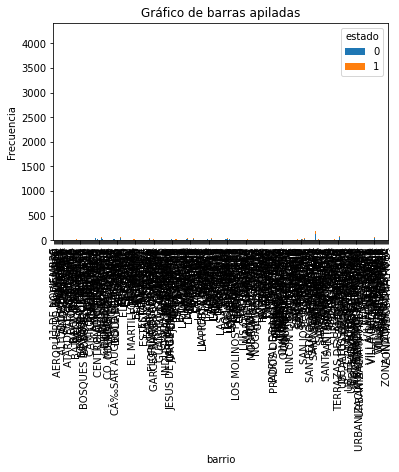

In [338]:
variable_a_evaluar = "barrio"

contingency_table = pd.crosstab(
    data[variable_a_evaluar], data[variable_objetivo])

# Realizar prueba de chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Imprimir resultados
print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p_value}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(pd.DataFrame(expected, index=contingency_table.index,
      columns=contingency_table.columns))
# Gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True)
plt.title('Gráfico de barras apiladas')
plt.xlabel(variable_a_evaluar)
plt.ylabel('Frecuencia')
plt.legend(title=variable_objetivo)
plt.show()


No se evidencia diferencia

In [339]:
variable_a_evaluar = "latitud"

contingency_table = pd.crosstab(
    data[variable_a_evaluar], data[variable_objetivo])

# Realizar prueba de chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Imprimir resultados
print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p_value}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(pd.DataFrame(expected, index=contingency_table.index,
      columns=contingency_table.columns))
# Gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True)
plt.title('Gráfico de barras apiladas')
plt.xlabel(variable_a_evaluar)
plt.ylabel('Frecuencia')
plt.legend(title=variable_objetivo)
plt.show()


Estadístico de chi-cuadrado: 3997.3191056962546
Valor p: 0.25781240212947026
Grados de libertad: 3940
Frecuencias esperadas:
estado               0          1
latitud                          
-25.670707    0.692128   0.307872
-20.469711    1.384257   0.615743
-20.202880    0.692128   0.307872
 1.211968     0.692128   0.307872
 1.879826     0.692128   0.307872
...                ...        ...
 40.969989   13.150441   5.849559
 43.156731   11.074056   4.925944
 48.641925  115.585459  51.414541
 49.159876    0.692128   0.307872
 50.075538    1.384257   0.615743

[3941 rows x 2 columns]


No se evidencia

In [ ]:
variable_a_evaluar = "latitud"

contingency_table = pd.crosstab(
    data[variable_a_evaluar], data[variable_objetivo])

# Realizar prueba de chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Imprimir resultados
print(f"Estadístico de chi-cuadrado: {chi2}")
print(f"Valor p: {p_value}")
print(f"Grados de libertad: {dof}")
print("Frecuencias esperadas:")
print(pd.DataFrame(expected, index=contingency_table.index,
      columns=contingency_table.columns))
# Gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True)
plt.title('Gráfico de barras apiladas')
plt.xlabel(variable_a_evaluar)
plt.ylabel('Frecuencia')
plt.legend(title=variable_objetivo)
plt.show()


In [ ]:
Se evidencia

Se analizarán programas con una vigencia de 730 máximo, donde el día 730 es diciembre 31 de 2022

In [27]:
fecha_final = datetime.strptime("2022-12-31", '%Y-%m-%d')
data["antiguedad_programa"] = data.fechaSolicitud.apply(
    lambda x: fecha_final - datetime.strptime(x, "%Y-%m-%d")).dt.days
df = data[data["antiguedad_programa"] < 730]
fig = make_subplots(rows=1, cols=1)
trace0 = go.Histogram(
    x=df[df["estado"] == "Inactivo "]["antiguedad_programa"], name="Inactivo", nbinsx=10)
trace1 = go.Histogram(x=df[df["estado"] == "Activo "]
                      ["antiguedad_programa"], name="Activo", nbinsx=10)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.update_layout(barmode="stack", 
                  barnorm="percent",
                  title_text='¿El estado es afectado por la antiguedad del programa?',
                  yaxis_title_text='Porcentaje de programas',
                  xaxis_title_text='Antiguedad del programa en días')
fig.show()


In [28]:
data.columns

Index(['CodigoPrograma', 'fechaSolicitud', 'tomador', 'edad',
       'fechaNacimiento', '#_inscritos_activos', '#_mascotas_activas',
       'FechaRescindido', 'valorCuota_1', 'valorUltimaCuota',
       'fechaIdealPago_CuotaCancelada', 'qinactivos', 'qactivos',
       'fechaactivoi', 'motivoactivoi', 'fechainactivof', 'motivoinactivof',
       'fechainactivoi', 'motivoinactivoi', 'fechaactivof', 'motivoactivof',
       'inactivof_activoi', 'inactivof_activof', 'inactivoi_activoi',
       'recauExitoso', 'recauFallido', 'Direccion', 'LocalidadVenta',
       'Nivel Socio Economico', 'Barrio', 'Localidad', 'Longitud', 'Latitud',
       'estado', 'motivo', 'antiguedad_programa'],
      dtype='object')

In [29]:

data["antiguedad_programaf"] = data.fechaactivof.apply(
    lambda x: fecha_final - datetime.strptime(x, "%Y-%m-%d")).dt.days
df1 = data[data["antiguedad_programaf"] < 730]
fig = make_subplots(rows=1, cols=1)
trace0 = go.Histogram(
    x=df1[df1["estado"] == "Inactivo "]["antiguedad_programa"], name="Inactivo", nbinsx=20)
trace1 = go.Histogram(x=df1[df1["estado"] == "Activo "]
                      ["antiguedad_programa"], name="Activo", nbinsx=20)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.update_layout(barmode="stack",
                  barnorm="percent",
                  title_text='¿El estado es afectado por la antiguedad del programa de la ultima fecha de activación?',
                  yaxis_title_text='Porcentaje de programas',
                  xaxis_title_text='Antiguedad del programa en días')
fig.show()


Parece mostrar que entre más antiguo es el programa más cantidad de inactivos hay

In [30]:
fig = make_subplots(rows=1, cols=1)
trace0 = go.Histogram(
    x=df[df["estado"] == "Inactivo "]["edad"], name="Inactivo", nbinsx=15)
trace1 = go.Histogram(x=df[df["estado"] == "Activo "]
                      ["edad"], name="Activo", nbinsx=15)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.update_layout(barmode="stack",
                  barnorm="percent",
                  title_text='¿La edad del tomador afecta el estado del programa?',
                  yaxis_title_text='Porcentaje de programas',
                  xaxis_title_text='Edad tomador')
fig.show()


La edad parece mostrar un compartimiento normal, donde de los 30 a los 70 años se encuentran la mayor cantidad de tomadores con programas activos

In [31]:
fig = make_subplots(rows=1, cols=1)
trace0 = go.Histogram(
    x=df[df["estado"] == "Inactivo "]["#_inscritos_activos"], name="Inactivo", nbinsx=10)
trace1 = go.Histogram(x=df[df["estado"] == "Activo "]
                      ["#_inscritos_activos"], name="Activo", nbinsx=10)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.update_layout(barmode="stack",
                  barnorm="percent",
                  title_text='¿El número de inscritos afecta el estado?',
                  yaxis_title_text='Porcentaje de programas',
                  xaxis_title_text='Cantidad de inscritos')
fig.show()


En todos los niveles se presenta programas activos, sin embargo, se evidencia un pequeño incremento

In [32]:
fig = make_subplots(rows=1, cols=1)
trace0 = go.Histogram(
    x=df[(df["estado"] == "Inactivo ") & (df["#_mascotas_activas"] > 0)\
        ]["#_inscritos_activos"], name="Inactivo", nbinsx=5)
trace1 = go.Histogram(x=df[(df["estado"] == "Activo ") & (df["#_mascotas_activas"] > 0)]
                      ["#_mascotas_activas"], name="Activo", nbinsx=5)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.update_layout(barmode="stack",
                  barnorm="percent",
                  title_text='¿El número de mascotas afecta el estado?',
                  yaxis_title_text='Porcentaje de programas',
                  xaxis_title_text='Cantidad de mascotas')
fig.show()


Se evidencia que con 2 mascotas hay menos probabilidad de deserción

In [33]:
fig = make_subplots(rows=1, cols=1)
trace0 = go.Histogram(
    x=df[(df["estado"] == "Inactivo ") & (df["valorCuota_1"] < 25000) & (df["valorCuota_1"] > 0)]["valorCuota_1"], name="Inactivo", nbinsx=20)
trace1 = go.Histogram(x=df[(df["estado"] == "Activo ") & (df["valorCuota_1"] < 25000) & (df["valorCuota_1"] > 0)]
                      ["valorCuota_1"], name="Activo", nbinsx=20)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.update_layout(barmode="stack",
                  barnorm="percent",
                  title_text='¿El valor de la cuota 1 afecta?',
                  yaxis_title_text='Porcentaje de programas',
                  xaxis_title_text='Valor cuota 1')
fig.show()


In [51]:
fig = make_subplots(rows=1, cols=1)
trace0 = go.Histogram(
    x=df[(df["estado"] == "Inactivo ") & (df["valorUltimaCuota"] < 25000) & (df["valorUltimaCuota"] > 0)]["valorUltimaCuota"], name="Inactivo", nbinsx=20)
trace1 = go.Histogram(x=df[(df["estado"] == "Activo ") & (df["valorUltimaCuota"] < 25000) & (df["valorUltimaCuota"] > 0)]
                      ["valorUltimaCuota"], name="Activo", nbinsx=20)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.update_layout(barmode="stack",
                  barnorm="percent",
                  title_text='¿El valor de la ultima cuota afecta el estado?',
                  yaxis_title_text='Porcentaje de programas',
                  xaxis_title_text='Valor de la ultima cuota')
fig.show()


No se evidencia que entre mayor sea la cuota, mayor cantidad de inactivos existen

In [55]:
export = df[df["valorUltimaCuota"] > 190000].sort_values("valorUltimaCuota", ascending=False)
export.to_csv("cuotas_altas", index=False)

In [ ]:
df[(df["estado"] == "Inactivo ") & (df["incrementos_cuota"] < 25000) & (df["incrementos_cuota"] > 0)])


In [35]:
fig = make_subplots(rows=1, cols=1)
df["incrementos_cuota"] = df["valorUltimaCuota"] - df["valorCuota_1"]
trace0 = go.Histogram(
    x=df[(df["estado"] == "Inactivo ") & (df["incrementos_cuota"] < 25000) & (df["incrementos_cuota"] > 0)]["incrementos_cuota"], name="Inactivo", nbinsx=20)
trace1 = go.Histogram(x=df[(df["estado"] == "Activo ") & (df["incrementos_cuota"] < 25000) & (df["incrementos_cuota"] > 0)]
                      ["incrementos_cuota"], name="Activo", nbinsx=20)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.update_layout(barmode="stack",

                  title_text='¿El incremento de la cuota afecta el estado?',
                  yaxis_title_text='Cantidad de programas',
                  xaxis_title_text='Incremento cuota')
fig.show()


/tmp/ipykernel_408/739720853.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Incrementos en la cuota no parece tener efecto

In [36]:
fig = make_subplots(rows=1, cols=1)
trace0 = go.Histogram(
    x=df[(df["estado"] == "Inactivo ")]["qactivos"], name="Inactivo", nbinsx=5)
trace1 = go.Histogram(x=df[(df["estado"] == "Activo ") ]
                      ["qactivos"], name="Activo", nbinsx=5)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.update_layout(barmode="stack",
                  barnorm="percent",
                  title_text='¿Cantidad de estados activos?',
                  yaxis_title_text='Porcentaje de activos',
                  xaxis_title_text='Cantidad veces activo')
fig.show()


In [37]:
fig = make_subplots(rows=1, cols=1)
trace0 = go.Histogram(
    x=df[(df["estado"] == "Inactivo ")]["motivoactivof"], name="Inactivo", nbinsx=5)
trace1 = go.Histogram(x=df[(df["estado"] == "Activo ")]
                      ["motivoactivof"], name="Activo", nbinsx=5)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.update_layout(barmode="stack",

                  title_text='¿Cantidad de estados activos?',
                  yaxis_title_text='Porcentaje de activos',
                  xaxis_title_text='Cantidad veces activo')
fig.show()


Poco aporta el motivo

In [38]:
fig = make_subplots(rows=1, cols=1)
trace0 = go.Histogram(
    x=df[(df["estado"] == "Inactivo ")]["recauExitoso"], name="Inactivo", nbinsx=20)
trace1 = go.Histogram(x=df[(df["estado"] == "Activo ")]
                      ["recauExitoso"], name="Activo", nbinsx=20)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.update_layout(barmode="stack",

                  title_text='¿Cantidad de recaudos exitosos?',
                  yaxis_title_text='Porcentaje de activos',
                  xaxis_title_text='Cantidad recaudos exitosos')
fig.show()


In [39]:
fig = make_subplots(rows=1, cols=1)
trace0 = go.Histogram(
    x=df[(df["estado"] == "Inactivo ")]["recauFallido"], name="Inactivo", nbinsx=10)
trace1 = go.Histogram(x=df[(df["estado"] == "Activo ")]
                      ["recauFallido"], name="Activo", nbinsx=10)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.update_layout(barmode="stack",
                  barnorm="percent",
                  title_text='¿Cantidad de recaudos fallidos?',
                  yaxis_title_text='Porcentaje de activos',
                  xaxis_title_text='Cantidad recaudos fallidos')
fig.show()


Parece mostrar que entre más recaudos fallidos más activos existen, pero no parece tener sentido

In [40]:
fig = make_subplots(rows=1, cols=1)
trace0 = go.Histogram(
    x=df[(df["estado"] == "Inactivo ")]["Nivel Socio Economico"], name="Inactivo", nbinsx=10)
trace1 = go.Histogram(x=df[(df["estado"] == "Activo ")]
                      ["Nivel Socio Economico"], name="Activo", nbinsx=10)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.update_layout(barmode="stack",
                  barnorm="percent",
                  title_text='¿Influye el nivel socio economico?',
                  yaxis_title_text='Porcentaje de activos',
                  xaxis_title_text='Nivel socio economico')
fig.show()


In [41]:
fig = make_subplots(rows=1, cols=1)
trace0 = go.Histogram(
    x=df[(df["estado"] == "Inactivo ")]["Barrio"], name="Inactivo", nbinsx=10)
trace1 = go.Histogram(x=df[(df["estado"] == "Activo ")]
                      ["Barrio"], name="Activo", nbinsx=10)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.update_layout(barmode="stack",
                  title_text='¿Influye el barrio?',
                  yaxis_title_text='Porcentaje de activos',
                  xaxis_title_text='Barrio')
fig.show()


In [42]:
df.columns

Index(['CodigoPrograma', 'fechaSolicitud', 'tomador', 'edad',
       'fechaNacimiento', '#_inscritos_activos', '#_mascotas_activas',
       'FechaRescindido', 'valorCuota_1', 'valorUltimaCuota',
       'fechaIdealPago_CuotaCancelada', 'qinactivos', 'qactivos',
       'fechaactivoi', 'motivoactivoi', 'fechainactivof', 'motivoinactivof',
       'fechainactivoi', 'motivoinactivoi', 'fechaactivof', 'motivoactivof',
       'inactivof_activoi', 'inactivof_activof', 'inactivoi_activoi',
       'recauExitoso', 'recauFallido', 'Direccion', 'LocalidadVenta',
       'Nivel Socio Economico', 'Barrio', 'Localidad', 'Longitud', 'Latitud',
       'estado', 'motivo', 'antiguedad_programa', 'incrementos_cuota'],
      dtype='object')